# HW3:  Introduction to Machine Learning and Project Proposal

This problem set will walk you through the basics of machine learning, including some of the development practices, the most popular libraries, and concepts in machine learning.

We'll start with the most classic dataset of them all:  R.A. Fisher's Iris dataset.  Fisher is most known for popularizing the standard hypothesis-testing approach to statistics, and this dataset comes from a 1936 paper.  It is a very easy dataset to learn because of the 3 types of flowers, 1 is linearly separable from the others in the data.

It's one of the datasets in the general-purpose "scikit-learn," or sklearn, module, which offers many tools and preprogrammed algorithms for machine learning.

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

Modules vary in how they prepackage their datasets, but scikit-learn's built-in datasets come in the form of dictionaries where you can look up the feature names, feature values, target values (classifications), and possibly other information.

In [28]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris

So, we're classifying flowers by some numerical features - the petal and sepal (green part under the petal) dimensions.  The proper labels have numerical values that map to the strings in target_names.

Recall that we want to have separate training, validation, and test data.  Validation is often done with "cross-validation," where slices of the training data are withheld as validation data.  But we still need to separate out some test data.

**1) It seems convenient to withhold the end of the feature and target arrays as test data.  Why is this a bad idea in general?  (For a hint, look closer at data['target']).**

Sometimes what might happen is that the dataset may be charactorized in order, therefore if you would take the data points from the beginning, it might overfit to those particular classes and might not work with classes that come up later, like how 2s might be left out in this case. It is always better to "shuffle" the data to ensure even distribution.



Scikit-learn comes with a function train_test_split() that automatically randomly partitions a set of features and a set of labels into train and test datasets.  It doesn't automatically create validation data, but that's because the validation strategy is often cross-validation, which iteratively withholds portions of the training data as validation data.

In [30]:
# random_state sets the random seed - this makes it easier to have common ground when talking about assignments
features_train, features_test, labels_train, labels_test = train_test_split(iris['data'], iris['target'], test_size=0.1, random_state=4100)

Using scikit-learn, the process of machine learning can be somewhat high-level, focused on choice of method and parameters instead of re-implementing the algorithm.  Here's how to train and perform cross-validation on an entropy-based decision tree learner for the Iris dataset.  The cross-validation here divides the training data into fifths, and trains 5 learners, each trained on 4/5 of the data and validated on a different 1/5.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(criterion="entropy", random_state=4100)
cross_val_score(dtree, features_train, labels_train)

array([0.92592593, 0.92592593, 0.92592593, 1.        , 1.        ])

At this point, we'd iterate on changing parameters to the learner until we're satisfied.  The options in scikit-learn for decision trees aren't as good as they could be - for example, there's no option to prune by statistical significance - but there are still several we could manipulate in the hopes of improving validation performance.

**2) Why should we not touch the test data while iterating on the parameters or architecture of a model?**

You should not try modifying parameters after touching the test set, which makes your ML algo overfit to the test itself, making it rather useless in real world. The learner would not be able to generalize itself, making it severely less robust. Make sure to only evaluate with the test set after making all the modifcations possible.



Let's suppose we're happy with these parameters for the decision tree.  We can then fit a model to all the training data, then evaluate it on the test data.

In [32]:
dtree.fit(features_train, labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4100, splitter='best')

In [33]:
dtree.score(features_test, labels_test) # Find accuracy on the test data

0.9333333333333333

Incidentally, we can now take advantage of the main strength of the decision tree, its inspectability, and see a representation of its decision process.

[Text(251.10000000000002, 407.7, 'petal length (cm) <= 2.45\nentropy = 1.584\nsamples = 135\nvalue = [46, 43, 46]\nclass = setosa'),
 Text(167.4, 353.34000000000003, 'entropy = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(334.8, 353.34000000000003, 'petal length (cm) <= 4.75\nentropy = 0.999\nsamples = 89\nvalue = [0, 43, 46]\nclass = virginica'),
 Text(167.4, 298.98, 'petal width (cm) <= 1.65\nentropy = 0.169\nsamples = 40\nvalue = [0, 39, 1]\nclass = versicolor'),
 Text(83.7, 244.62, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = versicolor'),
 Text(251.10000000000002, 244.62, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(502.20000000000005, 298.98, 'petal length (cm) <= 5.05\nentropy = 0.408\nsamples = 49\nvalue = [0, 4, 45]\nclass = virginica'),
 Text(418.5, 244.62, 'sepal length (cm) <= 6.5\nentropy = 0.946\nsamples = 11\nvalue = [0, 4, 7]\nclass = virginica'),
 Text(334.8, 190.26, 'sepal width (cm) <= 3.1\nentropy = 0.764\

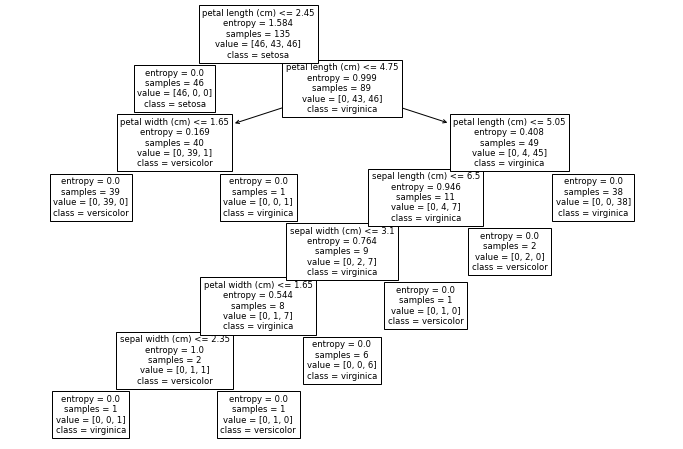

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(dtree, feature_names = iris["feature_names"], class_names = iris["target_names"])

**3) Notice the consistent value for entropy at the leaves of this tree.  Is this guaranteed to happen, for any dataset, if the tree is not pruning (this one is not)?  If yes, explain why.  If no, give a situation in which a leaf may have nonzero entropy.**

Decision trees without any further constraint on depth or entropy would keep branching until it reaches minimum possible entropy, which is 0. The classifier 
Decision trees without pruning tend to does this by overfitting and asking very specific questions, to make sure there is no "NO" in a YES or vice versa. This could be harmful because as with all overfitting, it wouldn't be generalized enough for diverse examples in the real world. It is better to instead prune using chi-square, max depth or anything to reach a tree after which classifying is meaningless, or wouldn't contribute to the tree.

The other machine learning classes in scikit-learn have very similar interfaces; it was designed to make switching between methods relatively easy.  While it might seem that each class in scikit-learn has very many parameters to its constructor, the defaults are often a pretty good starting place unless you have a reason to think they should be changed.

**4) Perform cross-validation on the Iris data with a k-nearest-neighbors classifier (KNeighborsClassifier), following the example above.  If you need it, the KNeighborsClassifier documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).  You shouldn't touch the test data yet.**

In [75]:
# TODO
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
cross_val_score(kNN, features_train, labels_train)


array([0.62135922, 0.66341463, 0.63902439, 0.66829268, 0.5902439 ])

There's an obvious parameter to play with for k nearest neighbors:  what's k?  Nothing about the iris dataset intuitively suggests an answer, so we just need to search for a good value.

**5) Iterate over values of k from 1 through 9 and find the value for k that gives the best mean accuracy during cross-validation.  Then evaluate on the test set.**

In [39]:
# TODO
from statistics import mean
best_k = 0
best_avg = 0
for k in range(1,10):
  kNN = KNeighborsClassifier(k)
  avg = mean(cross_val_score(kNN, features_train, labels_train))
  if best_avg < avg:
    best_avg = avg
    best_k = k
print(best_k)
kNN = KNeighborsClassifier(best_k)
kNN.fit(features_train, labels_train)
print(kNN.score(features_test, labels_test))

6
0.9333333333333333


The Iris dataset is a little easy if even a simple method like k-nearest-neighbors can score so highly.  We'll next look at learning to classify a face database, eventually trying a convolutional neural network.  lfw_people is a slightly dated dataset of faces of then-famous people.

In [41]:
from sklearn.datasets import fetch_lfw_people

# Whole process for new dataset, new method - decision forests

faces = fetch_lfw_people(min_faces_per_person = 100)

This dataset comes in two formats for the features.  faces["data"] represents the images as vectors of pixel brightnesses, convenient for the old-school assumption that the learner didn't need adjacency information and the learner would just figure it out.  faces["images"] represents the images as 2D arrays, more convenient for convolutional neural networks and any other methods that might care about pixel adjacency.

In [ ]:
faces

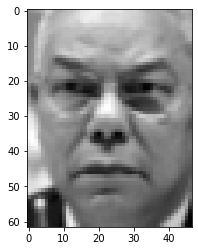

In [43]:
import matplotlib.pyplot as plt

plt.imshow(faces.images[5], cmap="gray")

A sort of minimal baseline performance would be to ignore the 2D representation and train k-nearest-neighbors on the vector representation.  This obviously is not going to be the best, but it can be useful to establish baselines with simple methods, so you know that when your deep neural network is performing worse than a knn classifier that you must have a bug or a bad design decision.

**6) Create a train/test split with random_state=4100 on the faces["data"] features and faces["target"] labels.  Then search for a good value of k for your knn classifier in the range [1,9], as you did above, and report your best test performance.**

In [45]:
#TODO: train-test split
features_train, features_test, labels_train, labels_test = train_test_split(faces['data'], faces['target'], test_size=0.1, random_state=4100)

In [47]:
#TODO: parameter search for k
best_k = 0
best_avg = 0
for k in range(1,10):
  kNN = KNeighborsClassifier(k)
  avg = mean(cross_val_score(kNN, features_train, labels_train))
  if best_avg < avg:
    best_avg = avg
    best_k = k
print(best_k)


8


In [48]:
#TODO: train and evaluate with best k
kNN = KNeighborsClassifier(best_k)
kNN.fit(features_train, labels_train)
print(kNN.score(features_test, labels_test))

0.6140350877192983


**7) How many dimensions does the feature space here have?  Does this number suggest k-NN will probably do well or somewhat poorly, and why?  (Note that the .shape field can tell you the image dimensions.)**



In [54]:
# TODO?: maybe writing code will help (optional)
faces.data[4].shape

(2914,)

It seems to have 2914 dimensions and with increasing number of dimensions, the quality of the kNN learner will drop as the clustering of data points isn't as compact in higher number of dimensions. The magnitude of distance between "nearest" neighbors ceases to be near with higher dimensions

Of course, k-nearest-neighbors is a bit of a straw man.  We could try a slightly stronger method:  a random forest (sklearn.ensemble.RandomForestClassifier).

**8) Cross-validate a RandomForestClassifier on the data, using the same train/test split (and same random seed, 4100).   You don't need to evaluate on the test data.**

In [57]:
# TODO - same experiment with random forest
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(), features_train, labels_train)

array([0.66504854, 0.71707317, 0.67804878, 0.67804878, 0.65853659])

Note that we could access the feature_importances_ field of the random forest if we thought the features were meaningful and we wanted to know which were most influential to the decision - but they're pixels, so we'll pass.

Okay, it's time to get serious -- it's well-understood that a convolutional neural network can do much better on this task, owing to its hierarchical feature processing, use of adjacency information, and ability to train filters that are less sensitive to the exact position of a feature in the image.

Neural networks have a lot of architectural decisions to make, but we can make progress by looking at a similar network, then modifying it based on how well the network does on the new task.  (Some projects literally take a *trained* network's early layers and build layers on top of those -- this is called transfer learning -- but we won't go that far here.)

**9) Adapt the code at https://keras.io/examples/vision/mnist_convnet/ (which was originally for digit recognition) so that you run the code on our face dataset instead of the MNIST digits dataset.  (Note that the image dimensions are different, and so is the number of classes.  Don't skip the expand_dims calls, as they actually fix the dimensions of the input to be what the network expects.)  You must also add a comment attributing the code for full credit, since you should get in this habit.**

In [62]:
# Set the random seeds (used for initializing random weights, for example)
# so that we have a common expected behavior to talk about
from numpy.random import seed
from tensorflow.random import set_seed

seed(4100)
set_seed(4100)
faces.target_names.shape

(5,)

In [72]:
# TODO - adapt the keras code with attribution
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 5
input_shape = (62, 47, 1)

# the data, split between train and test sets
x_train, x_test, y_train, y_test =  train_test_split(faces['images'], faces['target'], test_size=0.1, random_state=4100)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (1026, 62, 47, 1)
1026 train samples
114 test samples
Epoch 1/15
8/8 [==============================] - 3s 357ms/step - loss: 1.4609 - accuracy: 0.4128 - val_loss: 1.4550 - val_accuracy: 0.4466
Epoch 2/15
8/8 [==============================] - 3s 334ms/step - loss: 1.4039 - accuracy: 0.4648 - val_loss: 1.4635 - val_accuracy: 0.4466
Epoch 3/15
8/8 [==============================] - 3s 335ms/step - loss: 1.3855 - accuracy: 0.4648 - val_loss: 1.4408 - val_accuracy: 0.4466
Epoch 4/15
8/8 [==============================] - 3s 340ms/step - loss: 1.3622 - accuracy: 0.4648 - val_loss: 1.4223 - val_accuracy: 0.4466
Epoch 5/15
8/8 [==============================] - 3s 344ms/step - loss: 1.3364 - accuracy: 0.4648 - val_loss: 1.3842 - val_accuracy: 0.4563
Epoch 6/15
8/8 [==============================] - 3s 345ms/step - loss: 1.2789 - accuracy: 0.4843 - val_loss: 1.3404 - val_accuracy: 0.4660
Epoch 7/15
8/8 [==============================] - 3s 349ms/step - loss: 1.1980 - accuracy: 

Well, that was probably a bit disappointing.  But, this is the point at which you need to examine how the learning went and change your parameters accordingly.

**10) Look carefully at the history of training that was printed out, including training loss, training accuracy, validation loss, and validation accuracy.  Did the training really finish?  Try copying the model to the box below and rerunning with a parameter changed that will cause the training to run longer (64 iterations through the data).**

In [78]:
# TODO run longer!
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


batch_size = 128
epochs = 64

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/64
8/8 [==============================] - 3s 352ms/step - loss: 1.4481 - accuracy: 0.4442 - val_loss: 1.4549 - val_accuracy: 0.4466
Epoch 2/64
8/8 [==============================] - 3s 329ms/step - loss: 1.4090 - accuracy: 0.4648 - val_loss: 1.4677 - val_accuracy: 0.4466
Epoch 3/64
8/8 [==============================] - 3s 330ms/step - loss: 1.3912 - accuracy: 0.4648 - val_loss: 1.4423 - val_accuracy: 0.4466
Epoch 4/64
8/8 [==============================] - 3s 332ms/step - loss: 1.3643 - accuracy: 0.4648 - val_loss: 1.4202 - val_accuracy: 0.4466
Epoch 5/64
8/8 [==============================] - 3s 337ms/step - loss: 1.3469 - accuracy: 0.4648 - val_loss: 1.3931 - val_accuracy: 0.4466
Epoch 6/64
8/8 [==============================] - 3s 341ms/step - loss: 1.2938 - accuracy: 0.4865 - val_loss: 1.3547 - val_accuracy: 0.4660
Epoch 7/64
8/8 [==============================] - 3s 342ms/step - loss: 1.2260 - accuracy: 0.5298 - val_loss: 1.2882 - val_accuracy: 0.4854
Epoch 8/64
8/8 [====

That was an easy fix, but there are other issues we could try to address here.  We know the underlying problem is more difficult, but we haven't made the network any more complex to match.  There's also evidence of overfitting in the training history, since the accuracy on the training data is rather higher than the accuracy on the validation data.

**12) Describe one reasonable strategy for dealing with the overfitting.  (You don't need to implement it, since that likely involves some guesswork.)**

Changing the given can be a way to deal with overfitting. We can attempt to increase the droupout probability, or increase the size of MaxPooling to downsample even further, as this could be similar to convolution. We could technically add more convolution layers as well, with some filters and see if that works.

**13) Decide which of the following is most likely to help create high-level features:  doubling the number of filters (and feature maps) in the first convolutional layer, or doubling the number of filters (and feature maps) in the second layer.  Then copy your last network below, make the change, and train for the same number of iterations as your last network.**


In [77]:
# TODO more filters for higher-level features
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


batch_size = 128
epochs = 64

model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/64
8/8 [==============================] - 5s 576ms/step - loss: 1.4886 - accuracy: 0.4204 - val_loss: 1.4576 - val_accuracy: 0.4466
Epoch 2/64
8/8 [==============================] - 4s 549ms/step - loss: 1.4191 - accuracy: 0.4648 - val_loss: 1.4481 - val_accuracy: 0.4466
Epoch 3/64
8/8 [==============================] - 4s 547ms/step - loss: 1.4015 - accuracy: 0.4648 - val_loss: 1.4446 - val_accuracy: 0.4466
Epoch 4/64
8/8 [==============================] - 4s 550ms/step - loss: 1.3831 - accuracy: 0.4648 - val_loss: 1.4346 - val_accuracy: 0.4466
Epoch 5/64
8/8 [==============================] - 4s 555ms/step - loss: 1.3662 - accuracy: 0.4648 - val_loss: 1.3977 - val_accuracy: 0.4466
Epoch 6/64
8/8 [==============================] - 5s 564ms/step - loss: 1.3233 - accuracy: 0.4670 - val_loss: 1.3642 - val_accuracy: 0.4563
Epoch 7/64
8/8 [==============================] - 5s 568ms/step - loss: 1.2654 - accuracy: 0.5114 - val_loss: 1.2907 - val_accuracy: 0.4854
Epoch 8/64
8/8 [====

Clearly, we could carry on like this for quite a while in search of improved validation set performance, and people often do in order to optimize their networks.  (And you will if you choose the deep neural network project type!)  But, we won't belabor the point here.

**14) Evaluate the best of your networks on the test data.**

In [79]:
score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.19938024878501892
Test accuracy: 0.9473684430122375


# Final project proposal

You can choose from the five following templates:

1) *MCTS* - Implement Monte Carlo Tree Search on the board game of your choice with the nonrandom rollout strategy of your choice.  You're expected to implement the game mechanics for your chosen game (it shouldn't be Othello), but don't need to implement all of them.  Evaluation can consist of playing against humans, MCTS with random rollout, minimax, or something comparable (choose one).

2) *Deep neural networks* - Choose a somewhat difficult problem, probably one that involves images or sound, and try to train a deep neural network on a classification or regression problem.  (For full credit, you can't choose a dataset that already has a deep neural network tutorial online.)  You can and probably should base your design on an existing deep neural network for a *similar* problem, but then will need to run experiments to improve your performance; most of the work here will be on experiments instead of your first implementation.

3) *Coding other ML* - Code your own machine learning approach, then test it against out-of-the-box solutions from scikit-learn on a problem of your choosing.  Relatively less experimentation is expected than the deep learning approach, since you will spend more time coding.  Appropriate ML to code could include decision trees, k-nearest-neighbors with a fast implementation for lookup, boosting, or genetic algorithms (pick one).  (You can propose other algorithms, but they could be rejected as too easy or too hard.)

4) *Natural language processing* - As 2 or 3, but your data will be generated with a pass through BERT, a neural network that performs nonlinear dimensionality reduction to turn sentences into vectors.  The data becomes somewhat unintuitive, but is easy to work with from the coding side, and tends to produce reasonably good results easily.  The evaluation here will emphasize testing hypotheses about how the trained system works.  For a glimpse of BERT, consider the tutorial here:   https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

5) *Reinforcement learning* - Choose a board game or Atari video game to perform reinforcement learning on.  In the case of the board game (which isn't Othello), you can write your TD-learning code on top of minimax code.  In the case of the video game, you can try to optimize deep Q-learning for the chosen Atari game, with a style of evaluation similar to option 2.  You'll find OpenAI gym helpful for an Atari project:  https://gym.openai.com/

**F1) Who will be in your group?  (List 0-2 teammates; 1-2 is recommended)**
1. Chris Tozlowski
2. Amrit Ramesh

**F2) Which of the five project templates will you follow?  (MCTS, Deep NN, Comparing ML methods, Natural language, Reinforcement learning)**

Reinforcement Learning


**F3) What is your proposed project?  (This can be just a few sentences -- give us an idea of your plan.)**

Our proposed project would be RL of a Savlo version of Battleship (where a player launches 5 pins on the board instead of 1, and get info on hit/miss; and the number of shots you get decreses as the ships sink) -- we are still a bit unsure depending on the complexity and features involved for the particular game. We want to make an AI that can learn the game and play at a basic level against a human.


**F4) Answer the questions that correspond to your project template choice.**

**MCTS:  Describe your game.  What is your strategy for rollout?  What aspects of your game do you consider essential to implement, to evaluate the AI?**

**Deep NN:  How will you get your dataset?  What is a similar but not identical neural network?  What will you try to vary to make your project work better?**

**Comparing ML:  How will you get your dataset?  What methods do you propose to compare?  Which one will you implement yourself?**

**Natural language:  What is your system trying to determine?  Where will you get your dataset?  What is your hypothesis for what kinds of words will trigger the classification?**

**Reinforcement learning:  What features will your agent use to make decisions?  What code already exists to help you, and what is it about your project that will be different from that code?**


The main features if we'll be doing Savlo, will be number and type of ships remaining, the proportion of hits to misses, the number of consecutive pins and the the ships remaining. The code for standard Battleship RL is present on the web. We might need to code/debug to get Savlo working. 

**F5) Describe what will be done by the Week 5 and Week 6 milestones.  The Week 5 Milestone is *groundwork* - everything is in place to really get going - and the Week 6 milestone is *mostly there* - everything is basically done but needs debugging, tuning, and so on.  What do those mean for your project?**


Week 5 - a working implementation of the game with the standard AI to be played.

Week 6 - adding Savlo features for the AI and implementing RL

Week 7 - debugging and tweaking


Think carefully about your project choices - it's a good idea to pick subject matter with which you're familiar, and a method that you're interested to learn more about, rather than the other way around.  Happy daydreaming!

**Please remember to submit a PDF version of this assignment as well.  Thanks!**